In [1]:
path_figure = '/Users/lsimpson/Desktop/GitHub/Figures/'
from classo import *
import numpy as np
import scipy.io as sio

# Combo data

## Building matrices 

In [4]:
path = path_figure + 'exampleCOMBO/'
X0  = csv_to_mat('COMBO_data/complete_data/GeneraCounts.csv',begin=0).astype(float)
X_C = csv_to_mat('COMBO_data/CaloriData.csv',begin=0).astype(float)
X_F = csv_to_mat('COMBO_data/FatData.csv',begin=0).astype(float)
y   = csv_to_mat('COMBO_data/BMI.csv',begin=0).astype(float)[:,0]
labels  = csv_to_mat('COMBO_data/complete_data/GeneraPhylo.csv').astype(str)[:,-1]

y   = y - np.mean(y) #BMI data (n=96)
X_C = X_C - np.mean(X_C, axis=0)  #Covariate data (Calorie)
X_F = X_F - np.mean(X_F, axis=0)  #Covariate data (Fat)
X0 = clr(X0, 1 / 2).T

X      = np.concatenate((X0, X_C, X_F, np.ones((len(X0), 1))), axis=1) # Joint microbiome and covariate data and offset
label = np.concatenate([labels,np.array(['Calorie','Fat','Bias'])])
C = np.ones((1,len(X[0])))
C[0,-1],C[0,-2],C[0,-3] = 0.,0.,0.

X.shape

(96, 90)

## Create classo instance and change parameters 

In [5]:
problem = classo_problem(X,y,C, label=label)

problem.model_selection.LAMfixed                    = True
problem.model_selection.StabSelparameters.method      = 'lam'
problem.model_selection.StabSelparameters.threshold_label = 0.5
problem.model_selection.PATH = True

## R1

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.041
     lam : theoretical
     theoretical_lam = 0.1997
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2824
 

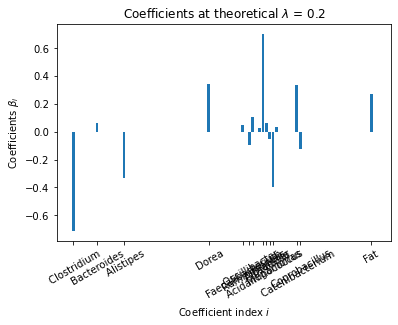

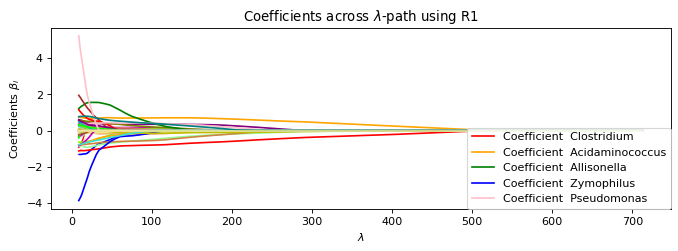

AttributeError: 'solution_StabSel' object has no attribute 'beta'

In [6]:
problem.formulation.concomitant = False
problem.solve()
problem.solution.PATH.save = path+'R1-'
problem.solution.StabSel.save1 = path+'R1-StabSel'
problem.solution.StabSel.save3 = path+'R1-StabSel-beta'
print(problem, problem.solution)

## R2

 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.041
     lam : theoretical
     theoretical_lam = 0.1997
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2824
 

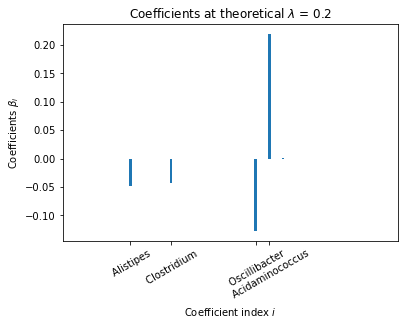

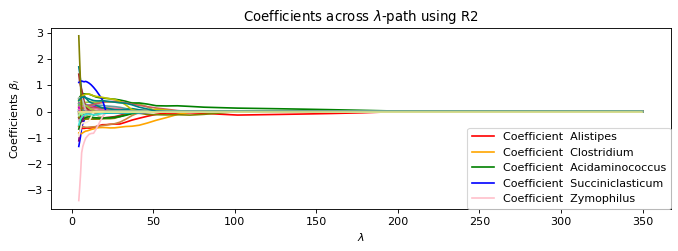

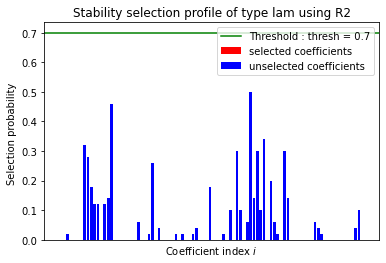

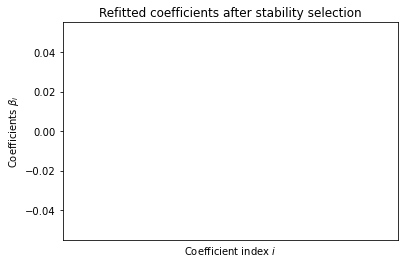


 LAMBDA FIXED : 
   Selected variables :   Alistipes     Clostridium     Oscillibacter     Acidaminococcus    
   Running time :  0.081s

 PATH COMPUTATION : 
   Running time :  1.93s

 STABILITY SELECTION : 
   Selected variables :  
   Running time :  7.141s



In [5]:
problem.formulation.huber = True
problem.solve()

problem.solution.PATH.save = path+'R2-'
problem.solution.StabSel.save1 = path+'R2-StabSel'
problem.solution.StabSel.save3 = path+'R2-StabSel-beta'
print(problem, problem.solution)

## R3

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.041
     lam : theoretical
     theoretical_lam = 0.1997
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2824
 

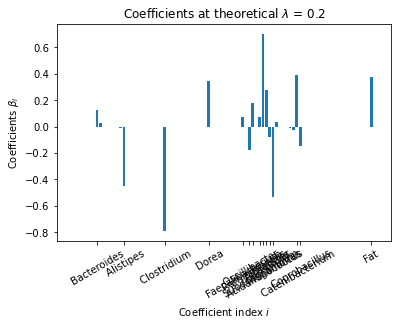

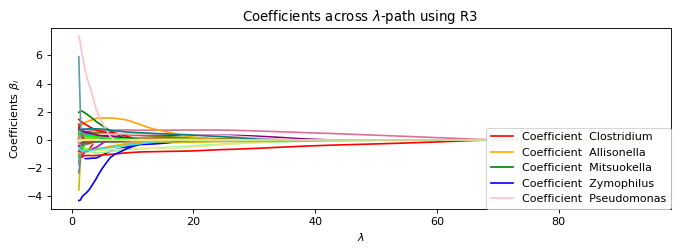

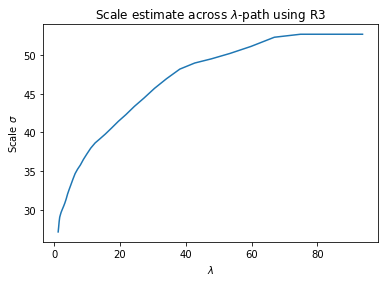

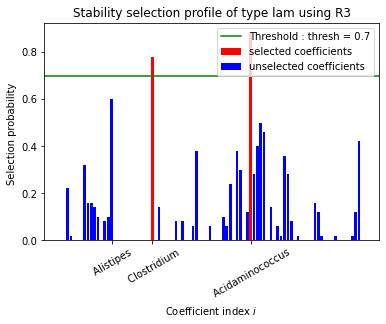

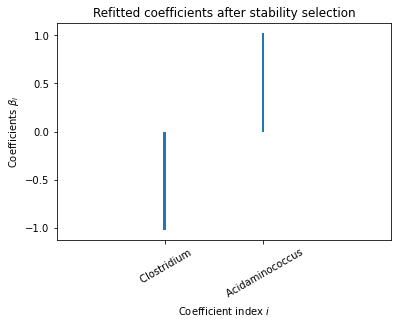


 LAMBDA FIXED : 
   Sigma  =  0.857
   Selected variables :   Bacteroides     Alistipes     Clostridium     Dorea     Faecalibacterium     Oscillibacter     Ruminococcus     Subdoligranulum     Acidaminococcus     Allisonella     Dialister     Megamonas     Catenibacterium     Coprobacillus    Fat    
   Running time :  0.021s

 PATH COMPUTATION : 
   Running time :  0.413s

 STABILITY SELECTION : 
   Selected variables :   Clostridium     Acidaminococcus    
   Running time :  1.786s



In [6]:
problem.formulation.concomitant = True
problem.formulation.huber = False


problem.solve()
problem.solution.PATH.save = path+'R3-'
problem.solution.StabSel.save1 = path+'R3-StabSel'
problem.solution.StabSel.save3 = path+'R3-StabSel-beta'
print(problem, problem.solution)

## R4

 
 
FORMULATION: R4
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.041
     lam : theoretical
     theoretical_lam = 0.1997
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2824
 

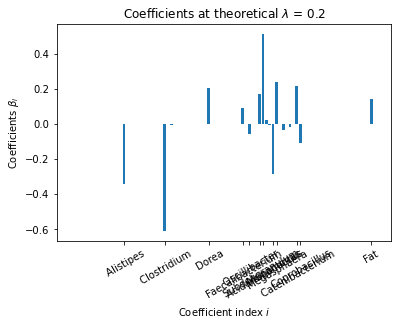

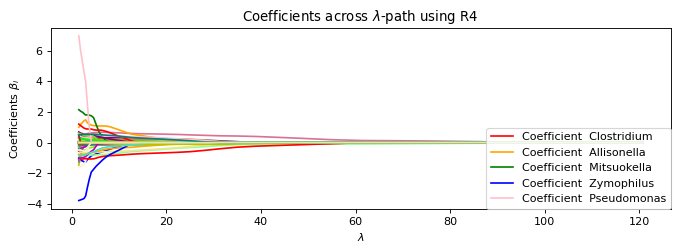

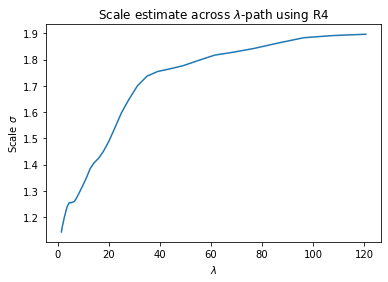

/Users/lsimpson/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


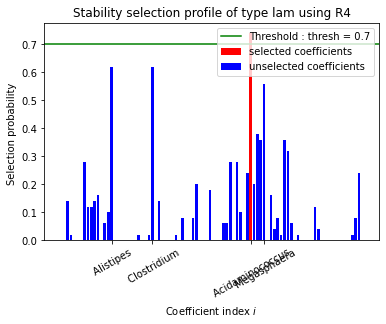

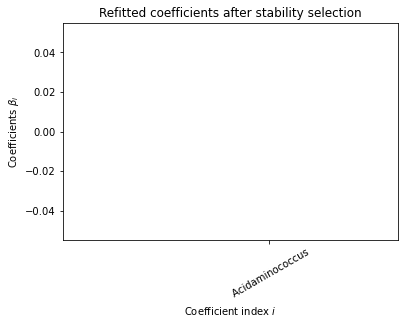


 LAMBDA FIXED : 
   Sigma  =  2.269
   Selected variables :   Alistipes     Clostridium     Dorea     Faecalibacterium     Oscillibacter     Subdoligranulum     Acidaminococcus     Megamonas     Megasphaera     Catenibacterium     Coprobacillus    Fat    
   Running time :  0.195s

 PATH COMPUTATION : 
   Running time :  117.273s

 STABILITY SELECTION : 
   Selected variables :   Acidaminococcus    
   Running time :  23.75s



In [7]:
problem.formulation.huber = True
problem.model_selection.StabSelparameters.seed = 123
problem.solve()
problem.solution.PATH.save = path+'R4-'
problem.solution.StabSel.save1 = path+'R4-StabSel'
problem.solution.StabSel.save3 = path+'R4-StabSel-beta'
print(problem, problem.solution)

# Filtered Combo data

## Building matrices 

In [8]:
path = path_figure + 'exampleFilteredCOMBO/'
X_C = csv_to_mat('COMBO_data/CaloriData.csv',begin=0).astype(float)
X_F = csv_to_mat('COMBO_data/FatData.csv',begin=0).astype(float)
X0  = csv_to_mat('COMBO_data/filtered_data/GeneraFilteredCounts.csv',begin=0).astype(float)

y   = csv_to_mat('COMBO_data/BMI.csv',begin=0).astype(float)[:,0]

labels  = csv_to_mat('COMBO_data/filtered_data/GeneraFilteredPhylo.csv').astype(str)[:,-1]

y   = y - np.mean(y) #BMI data (n=96)
X_C = X_C - np.mean(X_C, axis=0)  #Covariate data (Calorie)
X_F = X_F - np.mean(X_F, axis=0)  #Covariate data (Fat)
X0 = clr(X0, 1 / 2).T

X      = np.concatenate((X0, X_C, X_F, np.ones((len(X0), 1))), axis=1) # Joint microbiome and covariate data and offset
label = np.concatenate([labels,np.array(['Calorie','Fat','Bias'])])
C = np.ones((1,len(X[0])))
C[0,-1],C[0,-2],C[0,-3] = 0.,0.,0.

X.shape

(96, 48)

## Create classo instance and change parameters 

In [9]:
problem = classo_problem(X,y,C, label=label)

problem.model_selection.LAMfixed                    = True
problem.model_selection.StabSelparameters.method      = 'lam'
problem.model_selection.StabSelparameters.threshold_label = 0.5
problem.model_selection.PATH = True

## R1

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.089
     lam : theoretical
     theoretical_lam = 0.1771
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2504
 

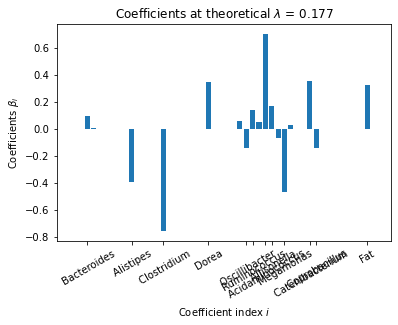

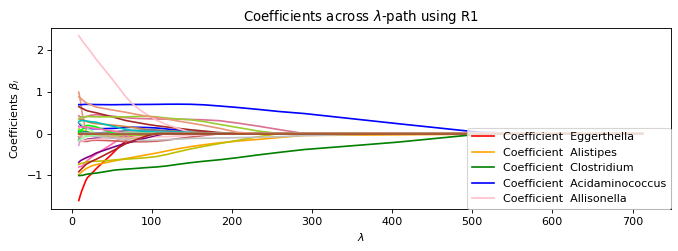

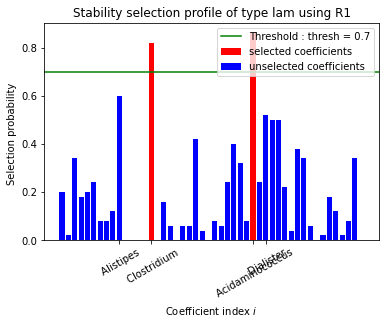

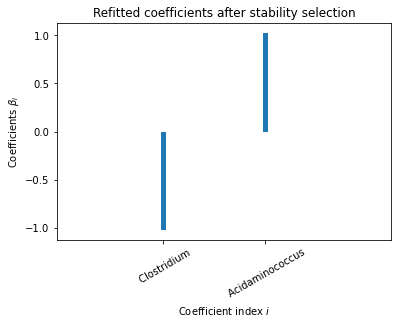


 LAMBDA FIXED : 
   Selected variables :   Bacteroides     Alistipes     Clostridium     Dorea     Oscillibacter     Ruminococcus     Acidaminococcus     Allisonella     Megamonas     Catenibacterium     Coprobacillus    Fat    
   Running time :  0.026s

 PATH COMPUTATION : 
   Running time :  0.363s

 STABILITY SELECTION : 
   Selected variables :   Clostridium     Acidaminococcus    
   Running time :  2.541s



In [10]:
problem.formulation.concomitant = False
problem.solve()
problem.solution.PATH.save = path+'R1-'
problem.solution.StabSel.save1 = path+'R1-StabSel'
problem.solution.StabSel.save3 = path+'R1-StabSel-beta'
print(problem, problem.solution)

## R2

 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.089
     lam : theoretical
     theoretical_lam = 0.1771
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2504
 

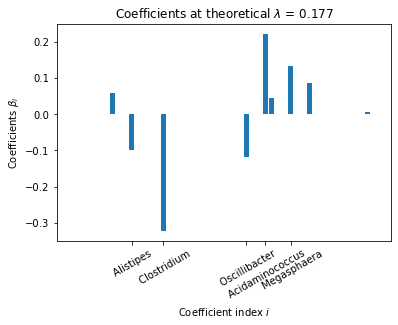

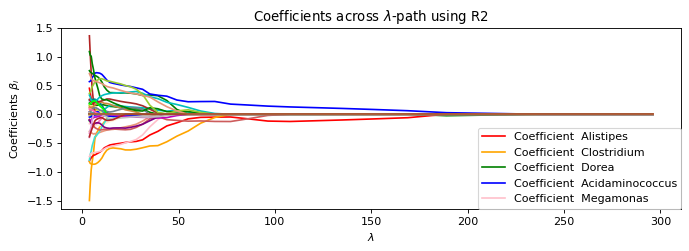

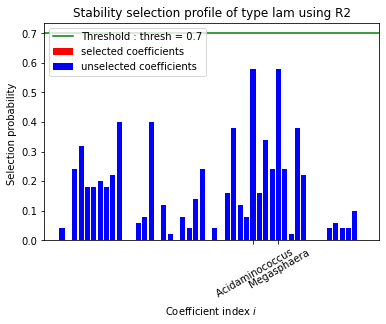

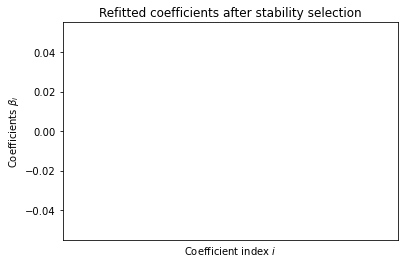


 LAMBDA FIXED : 
   Selected variables :   Alistipes     Clostridium     Oscillibacter     Acidaminococcus     Megasphaera    
   Running time :  0.315s

 PATH COMPUTATION : 
   Running time :  1.913s

 STABILITY SELECTION : 
   Selected variables :  
   Running time :  6.203s



In [11]:
problem.formulation.huber = True
problem.solve()

problem.solution.PATH.save = path+'R2-'
problem.solution.StabSel.save1 = path+'R2-StabSel'
problem.solution.StabSel.save3 = path+'R2-StabSel-beta'
print(problem, problem.solution)

## R3

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.089
     lam : theoretical
     theoretical_lam = 0.1771
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2504
 

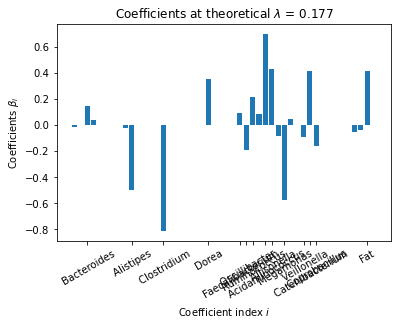

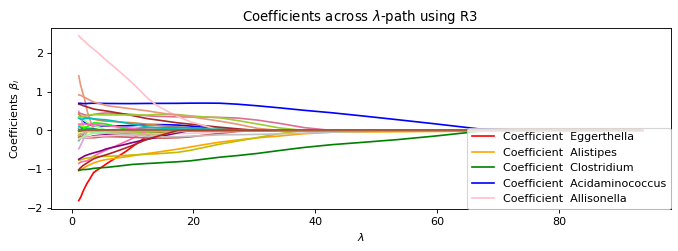

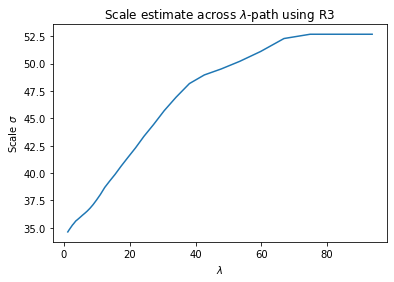

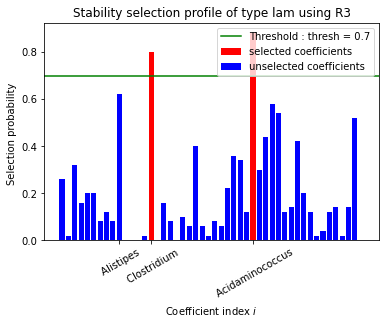

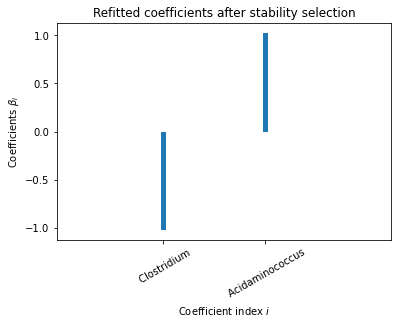


 LAMBDA FIXED : 
   Sigma  =  0.839
   Selected variables :   Bacteroides     Alistipes     Clostridium     Dorea     Faecalibacterium     Oscillibacter     Ruminococcus     Acidaminococcus     Allisonella     Megamonas     Veillonella     Catenibacterium     Coprobacillus    Fat    
   Running time :  0.017s

 PATH COMPUTATION : 
   Running time :  0.115s

 STABILITY SELECTION : 
   Selected variables :   Clostridium     Acidaminococcus    
   Running time :  1.22s



In [12]:
problem.formulation.concomitant = True
problem.formulation.huber = False
problem.model_selection.StabSelparameters.threshold_label = 0.6

problem.solve()
problem.solution.PATH.save = path+'R3-'
problem.solution.StabSel.save1 = path+'R3-StabSel'
problem.solution.StabSel.save3 = path+'R3-StabSel-beta'
print(problem, problem.solution)

## R4

 
 
FORMULATION: R4
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.089
     lam : theoretical
     theoretical_lam = 0.1771
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.2504
 

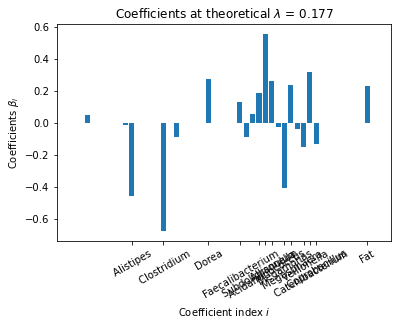

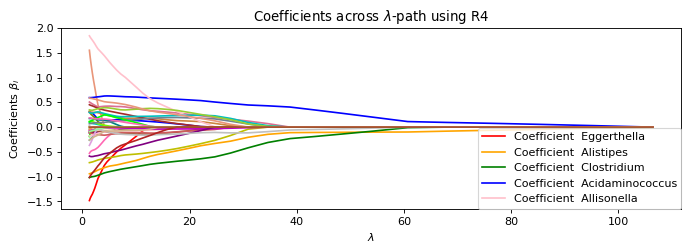

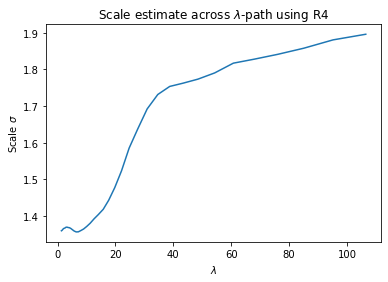

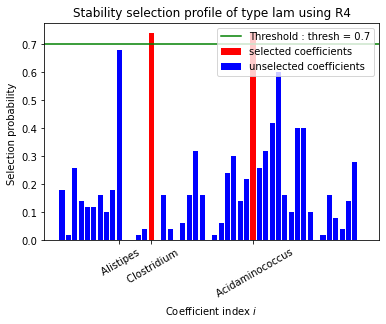

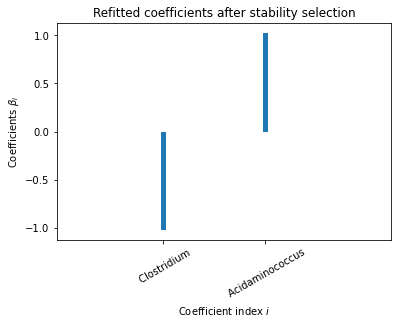


 LAMBDA FIXED : 
   Sigma  =  2.114
   Selected variables :   Alistipes     Clostridium     Dorea     Faecalibacterium     Subdoligranulum     Acidaminococcus     Allisonella     Megamonas     Megasphaera     Veillonella     Catenibacterium     Coprobacillus    Fat    
   Running time :  0.72s

 PATH COMPUTATION : 
   Running time :  52.117s

 STABILITY SELECTION : 
   Selected variables :   Clostridium     Acidaminococcus    
   Running time :  4.228s



In [13]:
problem.formulation.huber = True
problem.model_selection.StabSelparameters.seed = 123
problem.solve()
problem.solution.PATH.save = path+'R4-'
problem.solution.StabSel.save1 = path+'R4-StabSel'
problem.solution.StabSel.save3 = path+'R4-StabSel-beta'
print(problem, problem.solution)

# pH data

## Building matrices 

In [14]:
path = path_figure + 'examplepH/'
pH = sio.loadmat('pH_data/pHData.mat')
tax = sio.loadmat('pH_data/taxTablepHData.mat')['None'][0]

X,Y_uncent = pH['X'],pH['Y'].T[0]
y = Y_uncent-np.mean(Y_uncent) # Center Y

X.shape

(88, 116)

## Create classo instance and change parameters 

In [15]:
problem = classo_problem(X,y)

problem.model_selection.LAMfixed                    = True
problem.model_selection.StabSelparameters.method      = 'lam'
problem.model_selection.PATH = True

## R1

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.008
     lam : theoretical
     theoretical_lam = 0.2182
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.3085
 

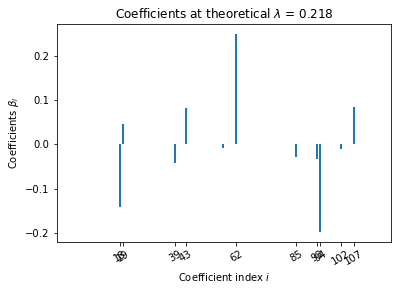

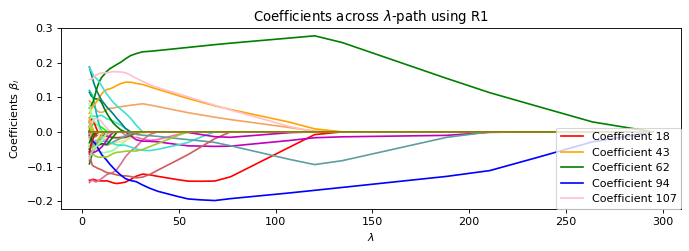

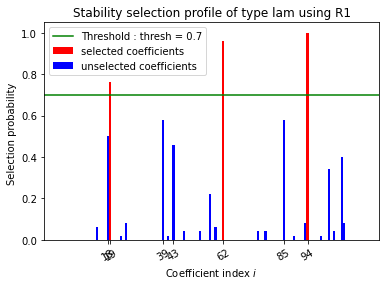

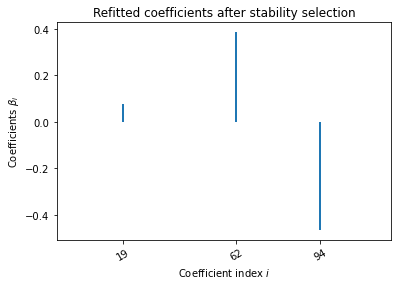


 LAMBDA FIXED : 
   Selected variables :  18    19    39    43    62    85    93    94    102    107    
   Running time :  0.031s

 PATH COMPUTATION : 
   Running time :  1.02s

 STABILITY SELECTION : 
   Selected variables :  19    62    94    
   Running time :  1.815s



In [16]:
problem.formulation.concomitant = False
problem.solve()
problem.solution.PATH.save = path+'R3-'
problem.solution.StabSel.save1 = path+'R3-StabSel'
problem.solution.StabSel.save3 = path+'R3-StabSel-beta'
print(problem, problem.solution)

## R2

 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.008
     lam : theoretical
     theoretical_lam = 0.2182
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.3085
 

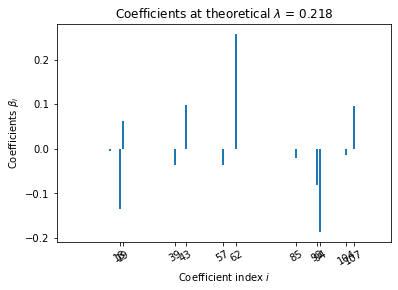

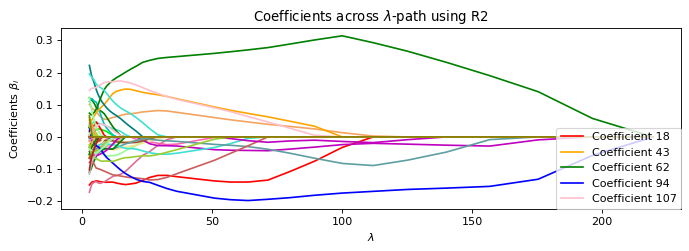

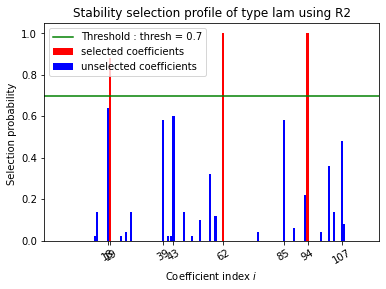

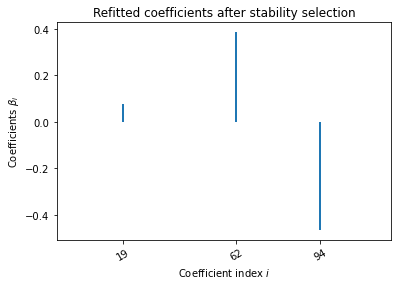


 LAMBDA FIXED : 
   Selected variables :  18    19    39    43    57    62    85    93    94    104    107    
   Running time :  0.467s

 PATH COMPUTATION : 
   Running time :  0.739s

 STABILITY SELECTION : 
   Selected variables :  19    62    94    
   Running time :  9.24s



In [17]:
problem.formulation.huber = True
problem.solve()

problem.solution.PATH.save = path+'R4-'
problem.solution.StabSel.save1 = path+'R4-StabSel'
problem.solution.StabSel.save3 = path+'R4-StabSel-beta'
print(problem, problem.solution)

## R3

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.008
     lam : theoretical
     theoretical_lam = 0.2182
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.3085
 

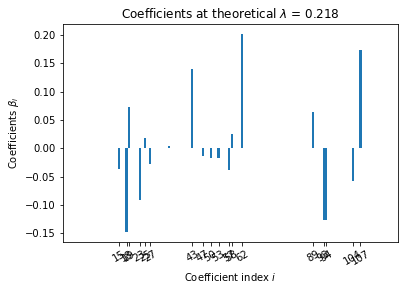

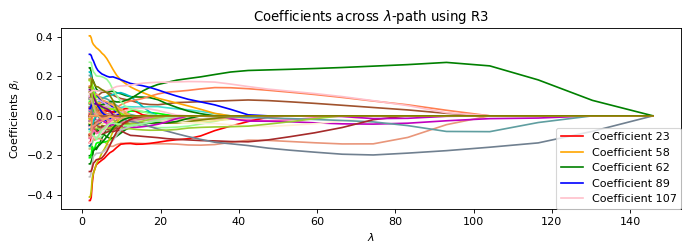

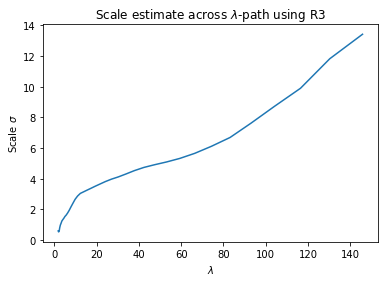

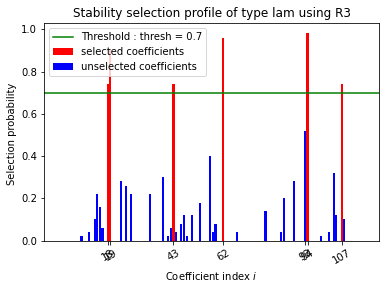

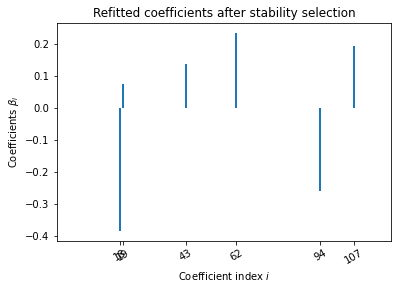


 LAMBDA FIXED : 
   Sigma  =  0.095
   Selected variables :  15    18    19    23    25    27    43    47    50    53    57    58    62    89    93    94    104    107    
   Running time :  0.655s

 PATH COMPUTATION : 
   Running time :  5.553s

 STABILITY SELECTION : 
   Selected variables :  18    19    43    62    94    107    
   Running time :  10.704s



In [18]:
problem.formulation.concomitant = True
problem.formulation.huber = False

problem.solve()
problem.solution.PATH.save = path+'R2-'
problem.solution.StabSel.save1 = path+'R2-StabSel'
problem.solution.StabSel.save3 = path+'R2-StabSel-beta'
print(problem, problem.solution)

## R4

 
 
FORMULATION: R4
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.008
     lam : theoretical
     theoretical_lam = 0.2182
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lam = theoretical
     theoretical_lam = 0.3085
 

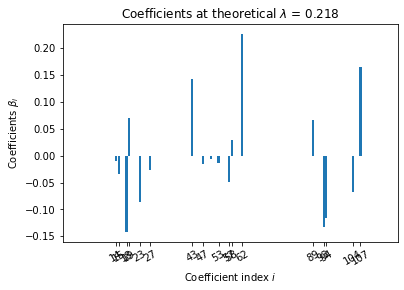

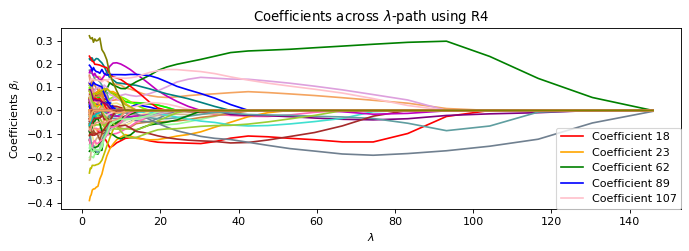

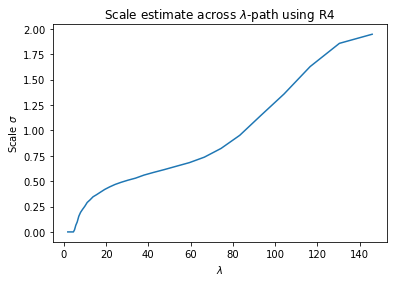

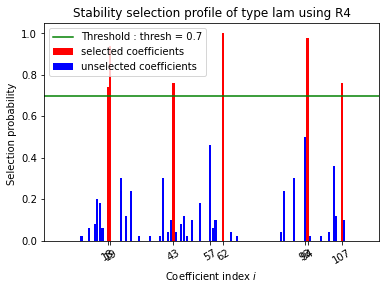

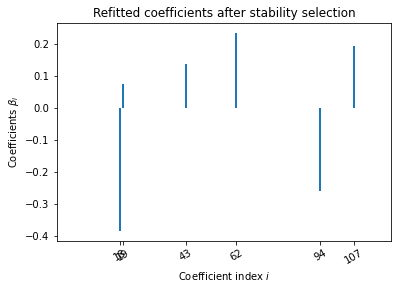


 LAMBDA FIXED : 
   Sigma  =  0.259
   Selected variables :  14    15    18    19    23    27    43    47    53    57    58    62    89    93    94    104    107    
   Running time :  0.178s

 PATH COMPUTATION : 
   Running time :  390.07s

 STABILITY SELECTION : 
   Selected variables :  18    19    43    62    94    107    
   Running time :  7.376s



In [19]:
problem.formulation.huber = True
problem.solve()
problem.solution.PATH.save = path+'R1-'
problem.solution.StabSel.save1 = path+'R1-StabSel'
problem.solution.StabSel.save3 = path+'R1-StabSel-beta'
print(problem, problem.solution)

# Tara data

## Building matrices 

###  importing data

In [2]:
path = path_figure + 'exampleTara/'
# import rpy2's package module
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects import r

/Users/lsimpson/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [3]:
#utils = rpackages.importr('utils')
#utils.chooseCRANmirror(ind=1) #
#utils.install_packages('Matrix')
#importr('Matrix')

In [4]:
pandas2ri.activate()
file = 'Tara/tara_sal_processed.RDS'
readRDS = robjects.r['readRDS']
rds = readRDS(file)
rds = pandas2ri.ri2py(rds)
D = dict({name:rds.rx(name)[0] for name in rds.names})

In [5]:
rA = r["as.matrix"](D["A"])
x,y, A = np.array(D['x']),np.array(D['y']), np.array(rA)

/Users/lsimpson/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Le chargement a nécessité le package : Matrix

  warnings.warn(x, RRuntimeWarning)


In [6]:
label_OTU = D['x'].colnames
label_sample = D['x'].rownames
label_nodes = rA.colnames
label_short = [l.split("::")[-1] for l in label_nodes]
print(y.shape)
print(x.shape)
print(A.shape)

(136,)
(136, 8916)
(8916, 9615)


### process similar to 2fit_trac_model.R

In [7]:
# similar to 2fit _trac_model.R in trac package
ntot = len(y)
n = round(2/3 * ntot)
perm = np.random.permutation(np.arange(ntot))
ytr = y[perm[n:]]
yte = y[perm[:n]]
pseudo_count = 1
Xtr = np.log(pseudo_count+x[perm[n:]])
Xte = np.log(pseudo_count+x[perm[:n]])

### process similar to trac 

In [8]:
Xtr = Xtr - np.mean(Xtr,axis=1)[:,np.newaxis]
y = y - np.mean(y)
CA = np.ones((1,Xtr.shape[1])).dot(A)
XtrA = Xtr.dot(A)


## Create classo instance and change parameters 

In [9]:
problem = classo_problem(XtrA,ytr,C=CA, label=label_short)

problem.model_selection.LAMfixed                    = True
problem.model_selection.StabSel                   = True
problem.model_selection.PATH                     = True
problem.model_selection.StabSelparameters.threshold_label = 0.5

problem.model_selection.LAMfixedparameters.lam = 0.1

## R1

In [10]:
problem.formulation.concomitant = False
problem.solve()

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.0
     lam = 0.1
     theoretical_lam = 0.5343
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50
 

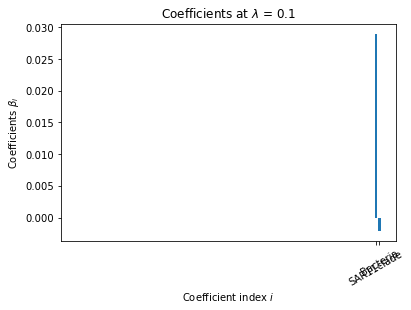

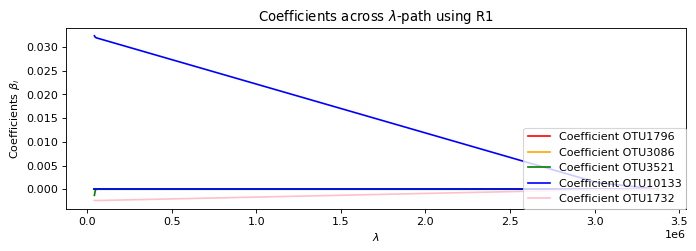

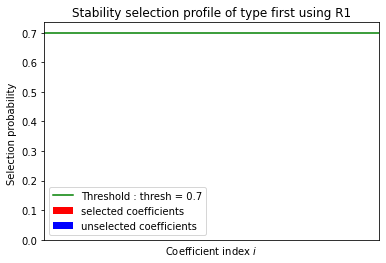

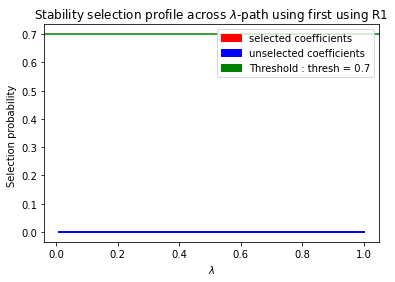

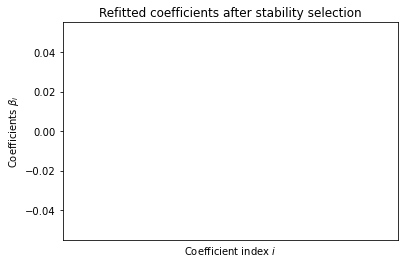


 LAMBDA FIXED : 
   Selected variables :  SAR11clade    Bacteria    
   Running time :  22.835s

 PATH COMPUTATION : 
   Running time :  22.261s

 STABILITY SELECTION : 
   Selected variables :  
   Running time :  1263.686s



In [11]:
problem.solution.LAMfixed.save = path+'R1-LAMfixed'
#problem.solution.PATH.save = path+'R1-'
#problem.solution.StabSel.save1 = path+'R1-StabSel'
#problem.solution.StabSel.save3 = path+'R1-StabSel-beta'
print(problem, problem.solution)